<a href="https://colab.research.google.com/github/hichanmedia/tiscon9/blob/main/3_3_z_height.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 画像から人を検出し高さの値を出す

In [ ]:
!pip install opencv-python-headless matplotlib

## プログラム修正後(4.1節参照)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
10 人物が検出されました。
Person 1: Height = 243 pixels
Person 2: Height = 293 pixels
Person 3: Height = 225 pixels
Person 4: Height = 195 pixels
Person 5: Height = 131 pixels
Person 6: Height = 173 pixels
Person 7: Height = 155 pixels
Person 8: Height = 164 pixels
Person 9: Height = 173 pixels
Person 10: Height = 154 pixels


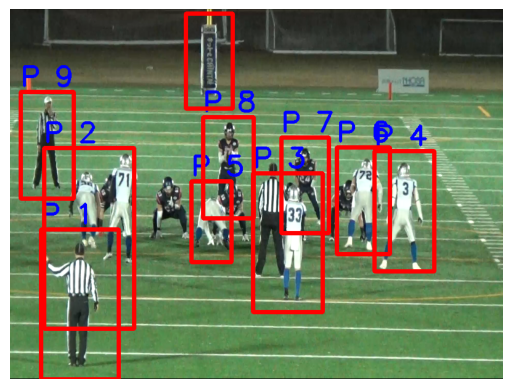

In [ ]:
from google.colab import drive
import cv2
import numpy as np
import matplotlib.pyplot as plt
from imutils.object_detection import non_max_suppression

# Google ドライブをマウント
drive.mount('/content/drive')

# Google ドライブ内の画像ファイルのパスを指定
image_path = '/content/drive/My Drive/path/test/height.png'

# 画像を読み込む
image = cv2.imread(image_path)

# 画像をリサイズ（必要に応じて）
resized_image = cv2.resize(image, (800, 600))

# HOGDescriptor を用いた人物検出器を初期化
hog = cv2.HOGDescriptor()
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())

# 人物を検出
(rects, weights) = hog.detectMultiScale(resized_image, winStride=(4, 4), padding=(8, 8), scale=1.1)

# 重複するバウンディングボックスを削除（非最大抑制）
rects = np.array([[x, y, x + w, y + h] for (x, y, w, h) in rects])
picks = non_max_suppression(rects, probs=None, overlapThresh=0.65)

# 検出された人物の数を表示
print(f"{len(picks)} 人物が検出されました。")

# 検出された人物のバウンディングボックスを描画し、番号と高さを表示
for i, (x1, y1, x2, y2) in enumerate(picks, start=1):
    # バウンディングボックスを描画
    cv2.rectangle(resized_image, (x1, y1), (x2, y2), (0, 0, 255), 5)

    # 番号をバウンディングボックスの上に描画
    cv2.putText(resized_image, f'P {i}', (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 1.5, (255, 0, 0), 3)

    # 高さを表示
    height = y2 - y1
    print(f"Person {i}: Height = {height} pixels")

# 検出結果を表示する
image_rgb = cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)
plt.axis('off')
plt.show()


## プログラム修正前(3.3節参照)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
17 人物が検出されました。
Per 1: 182 
Per 2: 170 
Per 3: 195 
Per 4: 142 
Per 5: 183 
Per 6: 313 
Per 7: 432 
Per 8: 423 
Per 9: 469 
Per 10: 389 
Per 11: 502 
Per 12: 451 
Per 13: 512 
Per 14: 609 
Per 15: 610 
Per 16: 690 
Per 17: 696 


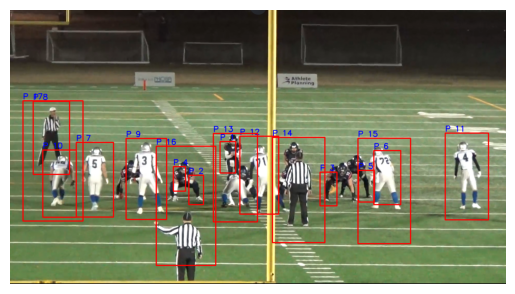

In [ ]:
from google.colab import drive
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Google ドライブをマウント
drive.mount('/content/drive')

# Google ドライブ内の画像ファイルのパスを指定
image_path = '/content/drive/My Drive/path/test/height2.png'

# 画像を読み込む
image = cv2.imread(image_path)

# 画像をグレースケールに変換（必要に応じて）
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# HOGDescriptor を用いた人物検出器を初期化
hog = cv2.HOGDescriptor()
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())

# 人物を検出
(rects, weights) = hog.detectMultiScale(image, winStride=(8, 8), padding=(8, 8), scale=1.05)

# 検出された人物の数を表示
print(f"{len(rects)} 人物が検出されました。")

# 検出された人物のバウンディングボックスを描画し、番号と高さを表示
for i, (x, y, w, h) in enumerate(rects, start=1):
    # バウンディングボックスを描画
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 0, 255), 5)

    # 番号をバウンディングボックスの上に描画
    cv2.putText(image, f'P {i}', (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 1.5, (255, 0, 0), 3)

    # 高さ（h）を表示
    print(f"Per {i}: {h} ")

# 検出結果を表示する
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)
plt.axis('off')
plt.show()

15 人物が検出されました。
Per 1: 206 
Per 2: 198 
Per 3: 144 
Per 4: 230 
Per 5: 258 
Per 6: 454 
Per 7: 527 
Per 8: 513 
Per 9: 461 
Per 10: 456 
Per 11: 504 
Per 12: 631 
Per 13: 732 
Per 14: 660 
Per 15: 808 


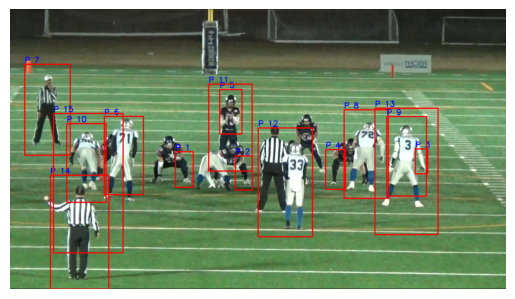

In [ ]:
# Google ドライブ内の画像ファイルのパスを指定
image_path2 = '/content/drive/My Drive/path/test/height.png'

# 画像を読み込む
image = cv2.imread(image_path2)

# 画像をグレースケールに変換（必要に応じて）
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# HOGDescriptor を用いた人物検出器を初期化
hog = cv2.HOGDescriptor()
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())

# 人物を検出
(rects, weights) = hog.detectMultiScale(image, winStride=(8, 8), padding=(8, 8), scale=1.05)

# 検出された人物の数を表示
print(f"{len(rects)} 人物が検出されました。")

# 検出された人物のバウンディングボックスを描画し、番号と高さを表示
for i, (x, y, w, h) in enumerate(rects, start=1):
    # バウンディングボックスを描画
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 0, 255), 5)

    # 番号をバウンディングボックスの上に描画
    cv2.putText(image, f'P {i}', (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 1.5, (255, 0, 0), 3)

    # 高さ（h）を表示
    print(f"Per {i}: {h} ")

# 検出結果を表示する
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)
plt.axis('off')
plt.show()